In [2]:
%load_ext autoreload
%autoreload 2
%aimport base
%aimport fluidsim.base.output.increments

In [107]:
from paths import load_df, paths_sim

df_w = load_df()
df = df_w[df_w["$n$"] == 3840]
df

,$n$,$c$,$\nu_8$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name
W3,3840,10,6.000402e-15,0.0,1.097854,115.339463,0.113343,inf,inf,1.0,3.599781,5.222821,49.85746,noise_c10nh3840Buinf
W7,3840,20,6.006974e-15,0.0,1.076911,115.339463,0.056309,inf,inf,1.0,4.493848,6.917684,119.89740,noise_c20nh3840Buinf
W11,3840,40,6.000402e-15,0.0,1.064035,115.339463,0.028042,inf,inf,1.0,6.066111,8.722656,49.82943,noise_c40nh3840Buinf
W14,3840,100,6.006974e-15,0.0,1.062093,115.339463,0.011210,inf,inf,1.0,9.413569,13.916670,119.89100,noise_c100nh3840Buinf
W18,3840,400,6.006974e-15,0.0,1.123243,115.339463,0.002855,inf,inf,1.0,19.165083,25.506900,119.40050,noise_c400nh3840Buinf


In [116]:
%matplotlib inline
from collections import namedtuple
import seaborn as sns
import h5py
from fluiddyn.io import stdout_redirected
import fluidsim as fls
from base import _index_where

RX = 0.1

Result = namedtuple("Result", ["rxs", "pdf", "values_inc", "nb_rx"])

def fig_pdf(path, fig, axes, tmin=0, tmax=1000, delta_t=0.5, label="", run_nb=0):
    with stdout_redirected():
        sim = fls.load_sim_for_plot(path, merge_missing_params=True)

    key_var = [
        'ux',
        'uy'
    ]
        
    with h5py.File(sim.output.increments.path_file, 'r') as f:
        dset_times = f['times']
        times = dset_times[...]
        rxs = f['rxs'][...]
        oper = f['/info_simul/params/oper']
        nx = oper.attrs['nx']
        Lx = oper.attrs['Lx']

    if tmax is None:
        tmax = times.max()

    deltax = Lx / nx
    rxs = np.array(rxs, dtype=np.float64) * deltax
    
    results = {}
    print(path, end=" ")
    for ax, key, result in zip(axes, key_var, (resx, resy)):
        print("key =", key, end=" ")
        results[key] = Result(
            rxs,
            *sim.output.increments.load_pdf_from_file(
                tmin=tmin, tmax=tmax, key_var=key)
        )
    print()

    less_than = lambda x, y: x[x<y]
    label = {"ux": r"$\delta u_L$", "uy": r"$\delta u_T$"}

    for key, ax in zip(results, axes.ravel()):
        res = results[key]
        idx = _index_where(res.rxs, RX)
        # sns.distplot(less_than(resx.pdf[idx], 0.2), 200, kde=False, label=key, ax=ax)
        ax.plot(res.values_inc[idx], res.pdf[idx], label=f"{label[key]} : c={sim.params.c2**0.5}")
        ax.legend()
        ax.set_ylabel("pdf")
        ax.set_xlabel(label[key])
        ax.set_yscale("log")

/media/avmo/lacie/13KTH/noise/SW1Lwaves_NOISE2_c=10_L=50.x50._3840x3840_2017-01-06_17-52-02 key = ux key = uy 
/media/avmo/lacie/13KTH/noise/SW1Lwaves_NOISE2_c=20_L=50.x50._3840x3840_2016-09-27_18-45-02 key = ux key = uy 
/media/avmo/lacie/13KTH/noise/SW1Lwaves_NOISE2_c=40_L=50.x50._3840x3840_2017-01-06_18-04-05 key = ux key = uy 
/media/avmo/lacie/13KTH/noise/SW1Lwaves_NOISE2_c=100_L=50.x50._3840x3840_2016-09-27_18-44-41 key = ux key = uy 
/media/avmo/lacie/13KTH/noise/SW1Lwaves_NOISE2_c=400_L=50.x50._3840x3840_2016-09-27_18-44-41 key = ux key = uy 
r_x = 0.1, n = 3840


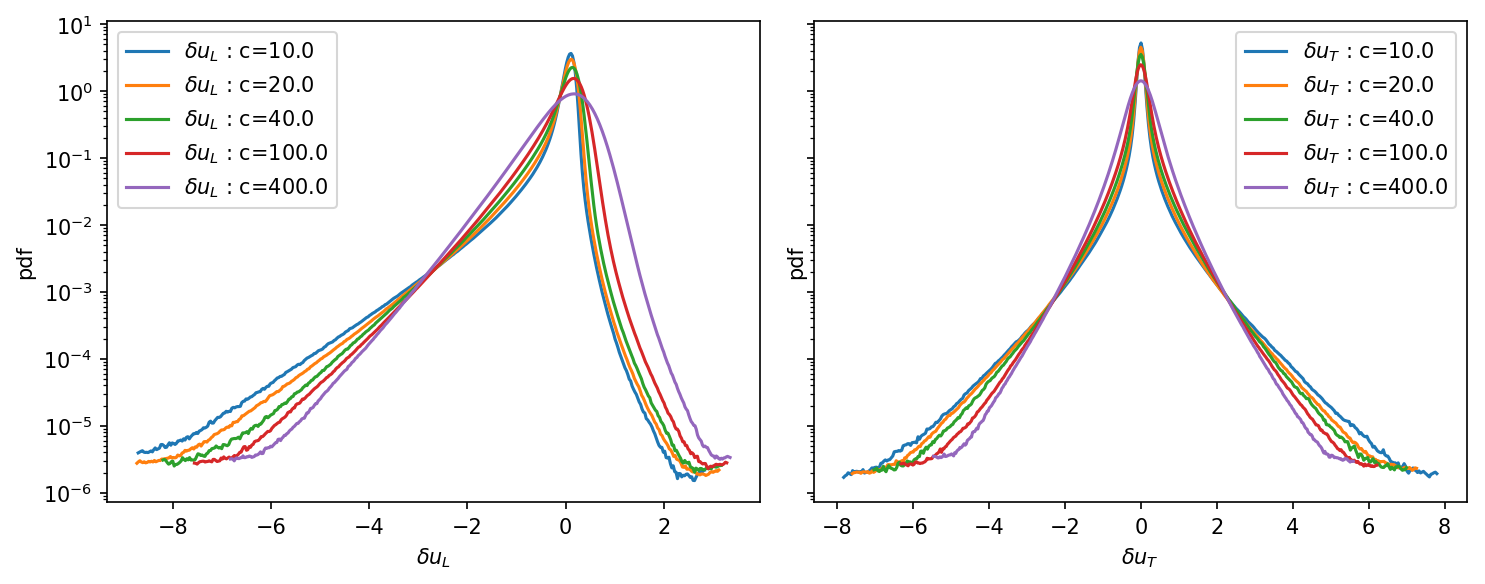

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=150)

for i, row in df.iterrows():
    tmin = row[r"$t_{stat}$"]
    short_name = row["short name"]
    path = paths_sim[short_name]
    fig_pdf(path, fig, axes, tmin, label=f"Run {row.name} {short_name}")

print(f"r_x = {RX}, n = {row['$n$']}")
fig.tight_layout()

In [97]:
resx.pdf

array([[5.97659879e-05, 5.37174104e-05, 5.26986114e-05, ...,
        6.69901318e-05, 6.43038554e-05, 7.14670238e-05],
       [3.71337604e-05, 3.70686558e-05, 3.62873397e-05, ...,
        3.36480623e-05, 3.51516253e-05, 3.70686206e-05],
       [2.95839184e-05, 2.85809991e-05, 2.93721218e-05, ...,
        3.12621552e-05, 3.17940698e-05, 3.07542939e-05],
       ...,
       [3.84014594e-04, 3.79449891e-04, 3.86553214e-04, ...,
        7.89252509e-04, 8.11833491e-04, 8.19136904e-04],
       [4.04994419e-04, 4.15750653e-04, 3.94387971e-04, ...,
        6.38502250e-04, 6.23855280e-04, 5.97190289e-04],
       [4.48560027e-04, 4.44693028e-04, 4.43861528e-04, ...,
        7.30425891e-04, 7.36040737e-04, 6.75837008e-04]])

In [96]:
resx.values_inc

array([[-4.40905681, -4.39398164, -4.37890647, ...,  1.57578463,
         1.5908598 ,  1.60593496],
       [-7.4761074 , -7.45093972, -7.42577203, ...,  2.51546275,
         2.54063044,  2.56579812],
       [-8.60268426, -8.5744167 , -8.54614915, ...,  2.61953444,
         2.64780199,  2.67606955],
       ...,
       [-5.67964616, -5.65033936, -5.62103255, ...,  5.95515464,
         5.98446144,  6.01376825],
       [-5.53514645, -5.50625806, -5.47736968, ...,  5.93354229,
         5.96243067,  5.99131906],
       [-5.31895345, -5.29085855, -5.26276364, ...,  5.83472238,
         5.86281728,  5.89091218]])

In [55]:
resy.values_inc.shape

(480, 400)

In [56]:
resx.rxs.shape

(480,)

In [121]:
resx.pdf.shape

(480, 400)

plot(tmin=4, tmax=1000, delta_t=0.10)
plot pdf eta
tmin =  4.03965 ; tmax =  49.9845 ; delta_t = 0.102427imin =       39 ; imax =      488 ; delta_i =        1


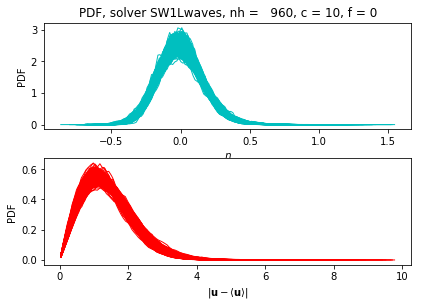

In [84]:

sim.output.pdf.plot(4, delta_t=0)